In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mesa_reader as m

# Lab 3 -- analyzing MESA output for the evolution of a Sun-like star

### 1. Load the time series data into an object d and list all the possible variables

"star_age" is time

"center_" means calculated for the core

"log_average_" means it is the logarithm of the value averaged over the star

"surf_" means evaluated at the surface

In [2]:
# set the path variable to the directory containing the data files
# you can leave this as an empty string if the files are in the same directory as the Jupyter notebook
path = ''
d = m.MesaData(file_name=path+'history.data')
ms = m.MesaData(file_name=path+'profile4.data')
rg = m.MesaData(file_name=path+'profile25.data')
d.read_data()
d.bulk_names

('model_number',
 'star_age',
 'star_mass',
 'log_abs_mdot',
 'log_dt',
 'num_zones',
 'log_total_angular_momentum',
 'log_rotational_mdot_boost',
 'log_max_residual',
 'log_residual_norm',
 'num_newton_iterations',
 'rel_E_err',
 'log_rel_E_err',
 'log_rel_run_E_err',
 'virial_thm_P_avg',
 'virial_thm_rel_err',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'epsnuc_M_1',
 'epsnuc_M_2',
 'epsnuc_M_3',
 'epsnuc_M_4',
 'epsnuc_M_5',
 'epsnuc_M_6',
 'epsnuc_M_7',
 'epsnuc_M_8',
 'he_core_mass',
 'c_core_mass',
 'o_core_mass',
 'si_core_mass',
 'fe_core_mass',
 'kh_timescale',
 'log_LH',
 'log_LHe',
 'log_L',
 'log_Teff',
 'log_R',
 'log_g',
 'surf_avg_j_rot',
 'surf_avg_omega',
 'surf_avg_omega_crit',
 'surf_avg_omega_div_omega_crit',
 'surf_avg_v_rot',
 'surf_avg_v_crit',
 'surf_avg_v_div_v_crit',
 'surf_avg_Lrad_div_Ledd',
 'log_center_T',
 'log_center_Rho',
 'log_center_P',
 'center_omega',
 'center_omega_div_omega_c

### 2. identify the main sequence phase of the star
hint: where does H burning in the core start? where does the star leave the "main sequence" strip of the H-R diagram?

>Looks like this star hits the main sequence pretty early in its lifetime (age <=0.1 Gyr) and stays on it for most of its lifetime. Things look pretty steady until about 11.9 or 12 Gyr when it leaves the main sequence.

you can also "Zoom in" by changing the start and end points of the x-axis tstart and tstop: plt.xlim(tstart,tstop) 

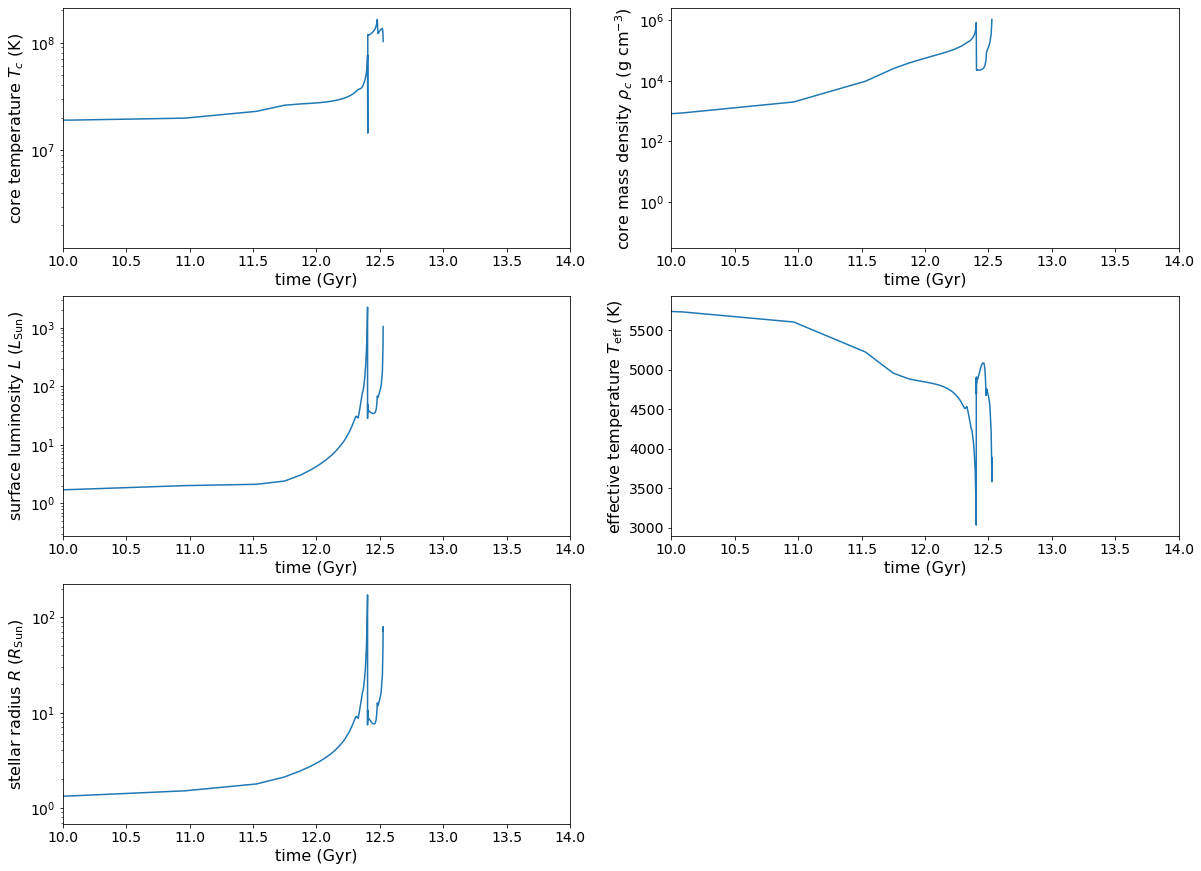

In [10]:
# change these values if you want to Zoom in to a certain time range
#tstart=-0.4; tstop=12.8
tstart=10.0; tstop=14.0

fig, axArr = plt.subplots(3,2,figsize=(20,15))
#plt.figure(figsize=(5,4))
axArr[0,0].semilogy(d.data('star_age')/1e9,10**d.data('log_center_T'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel('time (Gyr)',fontsize=16); axArr[0,0].set_ylabel(r'core temperature $T_c$ (K)',fontsize=16)
axArr[0,0].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[0,1].semilogy(d.data('star_age')/1e9,10**d.data('log_center_Rho'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel('time (Gyr)',fontsize=16); axArr[0,1].set_ylabel(r'core mass density $\rho_c$ (g cm$^{-3}$)',fontsize=16)
axArr[0,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,0].semilogy(d.data('star_age')/1e9,10**d.data('log_L'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel('time (Gyr)',fontsize=16); axArr[1,0].set_ylabel(r'surface luminosity $L$ ($L_{\rm Sun}$)',fontsize=16)
axArr[1,0].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[1,1].plot(d.data('star_age')/1e9,10**d.data('log_Teff'))
#ax = plt.gca()
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel('time (Gyr)',fontsize=16); axArr[1,1].set_ylabel(r'effective temperature $T_{\rm eff}$ (K)',fontsize=16)
axArr[1,1].set_xlim(tstart,tstop)

#plt.figure(figsize=(5,4))
axArr[2,0].semilogy(d.data('star_age')/1e9,10**d.data('log_R'))
#ax = plt.gca()
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel('time (Gyr)',fontsize=16); axArr[2,0].set_ylabel(r'stellar radius $R$ ($R_{\rm Sun}$)',fontsize=16)
axArr[2,0].set_xlim(tstart,tstop)

fig.delaxes(axArr[2,1])

### 3. let's look at the radial structure of the main sequence star

where in radius do you think is the outer boundary of the "core" and why? how much of the enclosed mass is in the core?

> All the graphs below have an inflection point at approximately $10^{-1}R_{sun}$. Pressure, Energry Generation Rate, Mass Density and Temperature (and Mass) start steep declines at this radius. This indicates that we've crossed the boundary between the core and the next layer (radiative zone?). I'm surprised by this, I previously considered the core to be a much smaller percentage of the overall radius of the sun; these graphs suggest that the core radius is about 10% of the overall radius.

> Looks like only about 10% of the mass is enclosed in the core, which seems way low. (was expecting on the order of 50% of mass to be enclosed within core)

are the conditions what you expect for a main sequence star in terms of core temperature and energy generation?

> Core temperature seems somewhat higher than I would have expected: core temperature looks to be 10 million K; expecting 1e6 K < T < 8e6 K

how does the density profile compare to what we assumed in HW3 problem 1?

> This star's density falls off a little more gradually than my answer to HW3.  My HW3 had density falling off a cliff.

(-0.05, 1.05)

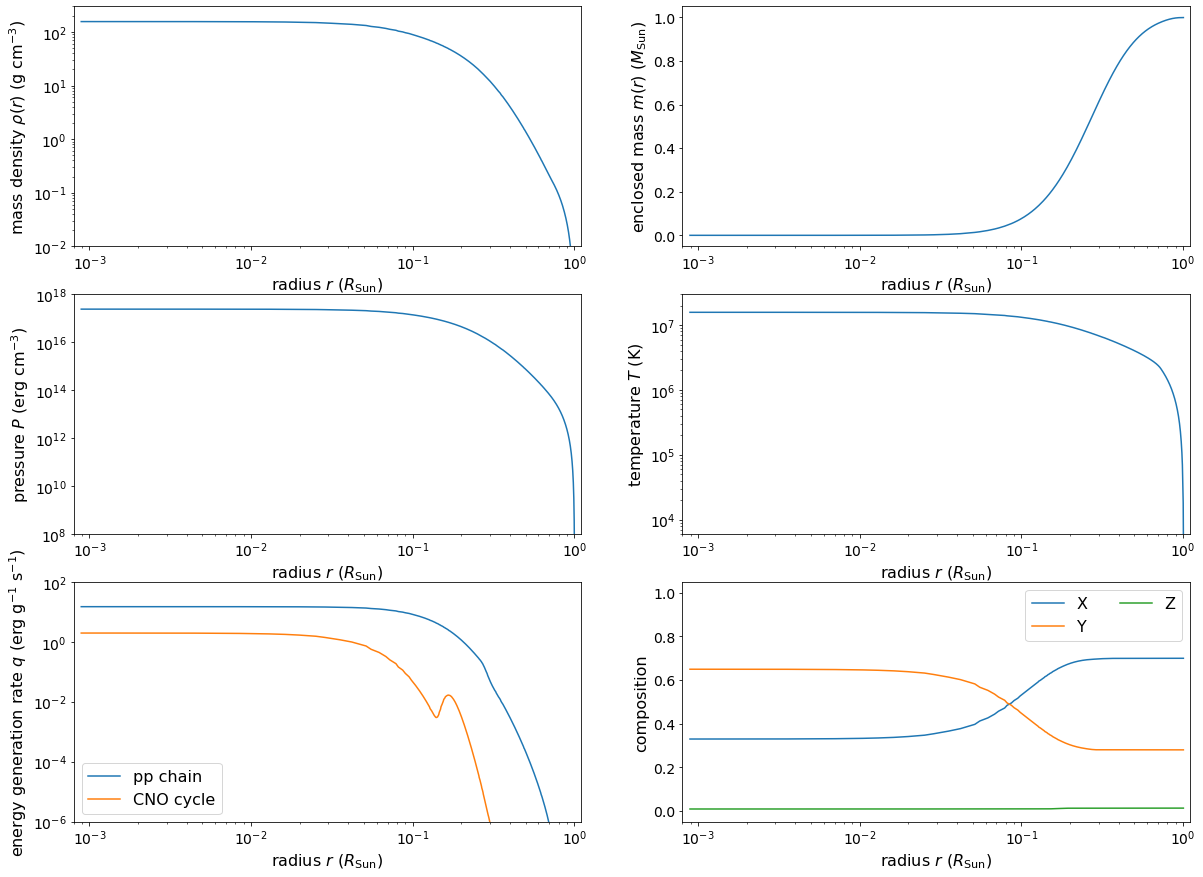

In [4]:
rstart=8e-4; rstop=1.1

fig, axArr = plt.subplots(3,2,figsize=(20,15))

axArr[0,0].loglog(ms.data('r_equatorial'),10**ms.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-2,3e2)

axArr[0,1].semilogx(ms.data('r_equatorial'),ms.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(ms.data('r_equatorial'),ms.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e8,1e18)

axArr[1,1].loglog(ms.data('r_equatorial'),10**ms.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,3e7)

axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('pp'),label='pp chain')
axArr[2,0].loglog(ms.data('r_equatorial'),ms.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e2)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('h1'),label='X')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('he4'),label='Y')
axArr[2,1].semilogx(ms.data('r_equatorial'),ms.data('c12')+ms.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

### 4. what happens just after the star leaves the main sequence?
for this part refer to the plots from Q2 as well as the new ones below showing the changes in composition over time

the main sequence is the phase where the star is burning hydrogen in the core. Is most of the hydrogen in the star converted to helium during this phase?

>I'm assuming the graph on the left refers to the average composition over the _core_ of the  star, not the whole star. This being the case about 1/2 of the core hydrogen is converted to helium, leaving the non-core hydrogen untouched. So no, it is not the case that most of the star's hydrogen is converted to helium over the main sequence phase.

just afterwards, is the core hot enough to burn He? what nuclear fuel is being consumed?

>**Just** afterwards (after Hydrogen fusion ceases) the temperature is **too low** to fuse Helium.  Helium requires temperatures on the order of $10^8 K$, the graph from the previous problem shows core temperatures to be on the order of $10^7 K$

given the star's location on the HR diagram (and/or its radius), what phase do you think this might be?

>Not clear which HR diagram is being mentioned -- there are no HR diagrams in the plots so far.  However, given that the main sequence phase represents 90% of a star's life cycle, chances are excellent that this star is in its core hydrogen burning phase and thus on the main sequence.


(-0.4, 12.8)

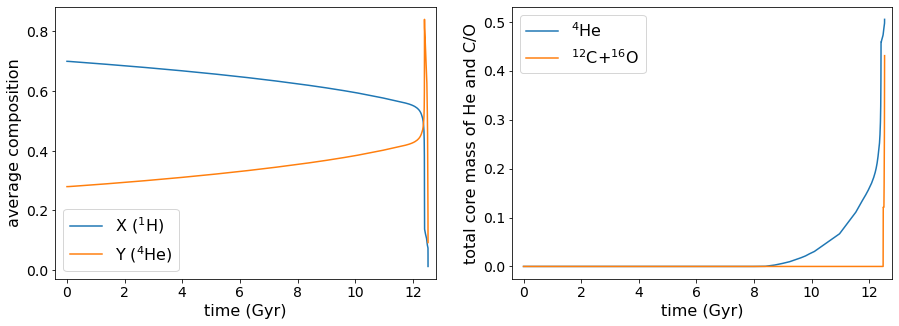

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_h1'),label=r'X ($^1$H)')
ax1.plot(d.data('star_age')/1e9,10**d.data('log_average_he4'),label=r'Y ($^4$He)')
ax1.legend(fontsize=16)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_xlabel('time (Gyr)',fontsize=16); ax1.set_ylabel(r'average composition',fontsize=16)
ax1.set_xlim(tstart,tstop)

ax2.plot(d.data('star_age')/1e9,d.data('he_core_mass'),label='$^4$He')
ax2.plot(d.data('star_age')/1e9,d.data('c_core_mass'),label='$^{12}$C$+^{16}$O')
ax2.legend(fontsize=16)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_xlabel('time (Gyr)',fontsize=16); ax2.set_ylabel(r'total core mass of He and C/O',fontsize=16)
ax2.set_xlim(tstart,tstop)

### 5. radial structure after leaving the main sequence
how does the radial structure of the star compare to when it was on the main sequence, e.g. in terms of the central  and surface density and total radius and mass? make sure to check the numerical values of the graphs as well as their shapes!

>As for enclosed mass, after the star leaves the main sequnece, about 60% of its mass is at radii greater than the stars radius when it was on the main sequence. The radius extends to two orders of magnitude greater than the star's radius when it was on the main sequence.
>The surface density is quite abit lower; the core density looks to be 4 orders of magnitude greater. The core also appears to be more compact (smaller radius than when the star was on the main sequence)

how has the composition of the core of the star changed? where is nuclear fusion occuring in the star during this phase? what is the main nuclear reaction chain taking place? is the peak energy generation rate smaller or larger than it was on the main sequence?

>The core composition has changed from being a mix of hydrogen and helium while on the main sequence to being nearly pure helium after leaving the main sequence.

>Fusion is occuring just outside the core (between $10^{-2}$ and $10^{-1}\ R_{sun}$) which is where the mass density drops percipitously.

>The _main_ nuclear reactin chain is the CNO cycle, by two orders of magnitude.

>The peak energy generation rate is larger than it was on the main sequence.

(-0.05, 1.05)

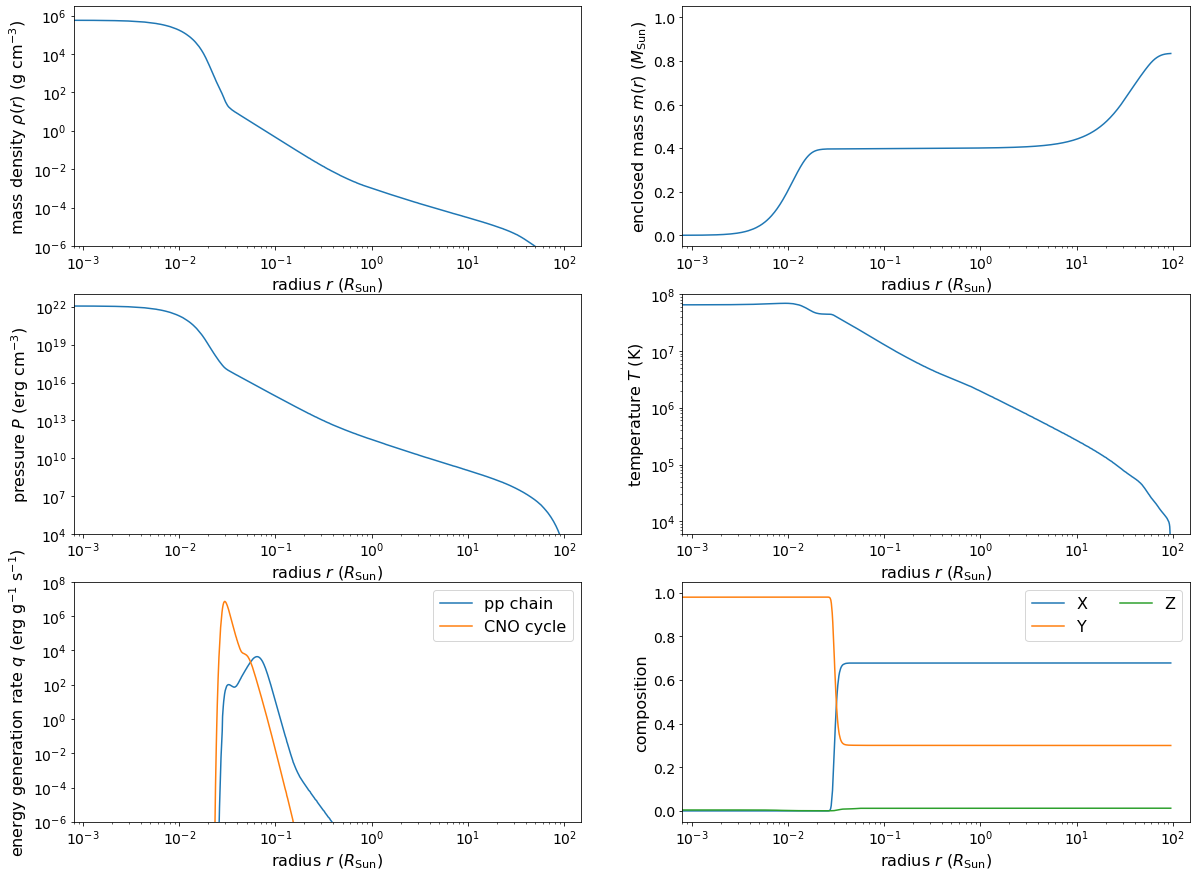

In [6]:
rstart=8e-4; rstop=1.5e2

fig, axArr = plt.subplots(3,2,figsize=(20,15))
axArr[0,0].loglog(rg.data('r_equatorial'),10**rg.data('logRho'))
axArr[0,0].xaxis.set_tick_params(labelsize=14)
axArr[0,0].yaxis.set_tick_params(labelsize=14)
axArr[0,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,0].set_ylabel(r'mass density $\rho(r)$ (g cm$^{-3}$)',fontsize=16)
axArr[0,0].set_xlim(rstart,rstop)
axArr[0,0].set_ylim(1e-6,3e6)

axArr[0,1].semilogx(rg.data('r_equatorial'),rg.data('mass'))
axArr[0,1].xaxis.set_tick_params(labelsize=14)
axArr[0,1].yaxis.set_tick_params(labelsize=14)
axArr[0,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[0,1].set_ylabel(r'enclosed mass $m(r)$ ($M_{\rm Sun}$)',fontsize=16)
axArr[0,1].set_xlim(rstart,rstop)
axArr[0,1].set_ylim(-0.05,1.05)

axArr[1,0].loglog(rg.data('r_equatorial'),rg.data('pressure'))
axArr[1,0].xaxis.set_tick_params(labelsize=14)
axArr[1,0].yaxis.set_tick_params(labelsize=14)
axArr[1,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,0].set_ylabel(r'pressure $P$ (erg cm$^{-3}$)',fontsize=16)
axArr[1,0].set_xlim(rstart,rstop)
axArr[1,0].set_ylim(1e4,1e23)

axArr[1,1].loglog(rg.data('r_equatorial'),10**rg.data('logT'))
axArr[1,1].xaxis.set_tick_params(labelsize=14)
axArr[1,1].yaxis.set_tick_params(labelsize=14)
axArr[1,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[1,1].set_ylabel(r'temperature $T$ (K)',fontsize=16)
axArr[1,1].set_xlim(rstart,rstop)
axArr[1,1].set_ylim(6e3,1e8)

axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('pp'),label='pp chain')
axArr[2,0].loglog(rg.data('r_equatorial'),rg.data('cno'),label='CNO cycle')
axArr[2,0].xaxis.set_tick_params(labelsize=14)
axArr[2,0].yaxis.set_tick_params(labelsize=14)
axArr[2,0].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,0].set_ylabel(r'energy generation rate $q$ (erg g$^{-1}$ s$^{-1}$)',fontsize=16)
axArr[2,0].set_xlim(rstart,rstop)
axArr[2,0].set_ylim(1e-6,1e8)
axArr[2,0].legend(fontsize=16)

axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('h1'),label='X')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('he4'),label='Y')
axArr[2,1].semilogx(rg.data('r_equatorial'),rg.data('c12')+rg.data('o16'),label='Z')
axArr[2,1].xaxis.set_tick_params(labelsize=14)
axArr[2,1].yaxis.set_tick_params(labelsize=14)
axArr[2,1].set_xlabel(r'radius $r$ ($R_{\rm Sun}$)',fontsize=16); axArr[2,1].set_ylabel(r'composition',fontsize=16)
axArr[2,1].set_xlim(rstart,rstop)
axArr[2,1].legend(fontsize=16,ncol=2)
axArr[2,1].set_ylim(-0.05,1.05)

### 6. Summary and further evolution

the next phases get even more extreme. When does $^4$He start fusing in the core (the "helium flash")? Does that make sense in terms of the core temperature?

>From the evolution graphs (probelm 2) there is an abrupt jump in core temperature at about 12.5Gyr. The core temperature jumps to over $10^8 K$ which is sufficiently hot for Helium fusion. This evidence suggests that the temperature jump was indeed the Helium Flash and it occurred at about 12.5 Gyr into the star's life.

Based on the graphs in Q2, why are the phases following the main sequence so much shorter? You might reason in terms of energy balance (fuel consumption) or core temperature (luminosity)

>The star has only so much energy available to radiate away. Luminosity is the rate at which the star radiates energy. The graphs in Problem 2 show a big jump in luminosity. This increased rate of radiation consumes the availabe energy in a much shorter time than smaller luminosity of the previous (main sequence) phase of the star.

Optional to find on your own using the data object d: 

--according to this calculation, what are the "final" mass and radius of the star? How can you explain that result for the mass?

>Not sure what the units of the data column `log_R` are. When exponentiated, `R` appears to be in units of $10^5\ km$. Given that, the _final_ stellar radius is about $71x10^5\ km$ which is about 10 times greater than the radius of the sun.

>Mass looks to be about 0.5 that of ths sun or $10^{30}\ kg$

--what is the core made of in the end state?

>The right panel of the graph in Problem 3 shows the core to be about 40% Carbon and Oxygen and about 50% Helium.  The other 5% is probably some other metals.

Note that the later stages starting with the "helium flash" are uncertain, and the details e.g. numbers for real stars have some uncertainty

Text(0.5, 0, 'Time (Gyr)')

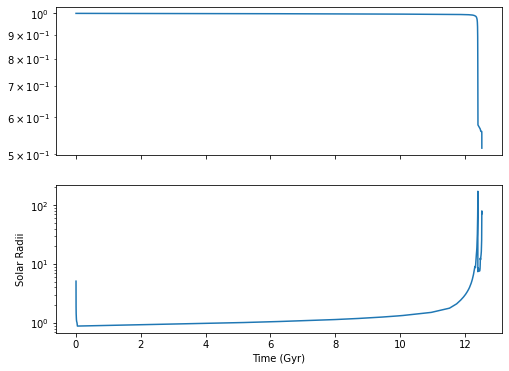

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.subplots(2,1,sharex=True)
ax[0].semilogy(d.data('star_age')/1e9, d.data('star_mass'))

ax[1].semilogy(d.data('star_age')/1e9,10**d.data('log_R'))
ax[1].set_ylabel('Solar Radii')
ax[1].set_xlabel('Time (Gyr)')


In [17]:
10**d.data('log_R')[-10:]

array([76.06583528, 77.412018  , 78.41967639, 79.29698783, 79.54837365,
       79.48162979, 78.66409104, 76.71800436, 72.21281257, 71.28370504])

In [18]:
d.data('star_mass')[-10:]

array([0.54247117, 0.53970542, 0.53690021, 0.53363394, 0.53037714,
       0.52660037, 0.5230187 , 0.51913768, 0.51536367, 0.51492947])